In [40]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_samples = 1000

time_of_day = pd.date_range("2024-01-01", periods=num_samples)
outdoor_temp = np.random.normal(18, 5, num_samples).clip(5, 35)
humidity = np.random.uniform(30, 80, num_samples)
occupancy = np.random.choice([0, 1], num_samples, p=[0.4, 0.6])
user_pref_temp = np.random.normal(21.5, 2, num_samples).clip(18, 25)
indoor_temp_before = np.random.normal(22, 3, num_samples).clip(15, 30)

energy_before = np.where(
    occupancy == 1,
    2.5 + np.random.normal(1, 0.5, num_samples),
    1.2 + np.random.normal(0.4, 0.2, num_samples)
)

energy_after = energy_before - np.random.uniform(0.2, 1.0, num_samples)

energy_after = np.maximum(energy_after, 0.5)

df = pd.DataFrame({
    "Time_of_Day": time_of_day,
    "Outdoor_Temp_C": outdoor_temp,
    "Occupancy": occupancy,
    "User_Pref_Temp_C": user_pref_temp,
    "Indoor_Temp_Before_C": indoor_temp_before,
    "Humidity_Percentage": humidity,
    "Energy_Consumption_Before_kWh": energy_before,
    "Energy_Consumption_After_kWh": energy_after
})


csv_path = "/ai_cooling_data.csv"
df.to_csv(csv_path, index=False)

csv_path


'/ai_cooling_data.csv'

✅ Data Loaded Successfully!


,Time_of_Day,Outdoor_Temp_C,Occupancy,User_Pref_Temp_C,Indoor_Temp_Before_C,Humidity_Percentage,Energy_Consumption_Before_kWh,Energy_Consumption_After_kWh
0,2024-01-01 00:00:00,20.483571,0,20.286599,19.079863,38.374129,1.681888,1.345279
1,2024-01-01 01:00:00,17.308678,0,21.922567,25.021400,35.228392,1.544666,1.163196
2,2024-01-01 02:00:00,21.238443,0,23.900158,23.008435,61.821512,1.622679,0.962278
3,2024-01-01 03:00:00,25.615149,0,20.516195,21.317571,65.323786,1.691799,1.153048
4,2024-01-01 04:00:00,16.829233,1,18.000000,19.528194,31.579307,3.392020,2.780078


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


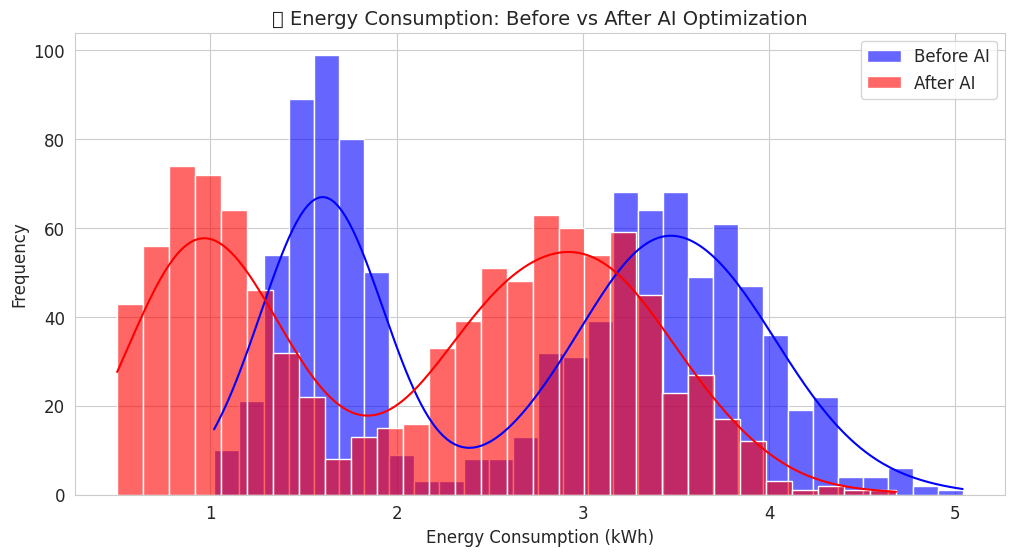

Text(0.5, 1.0, '📈 Feature Correlation Heatmap')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


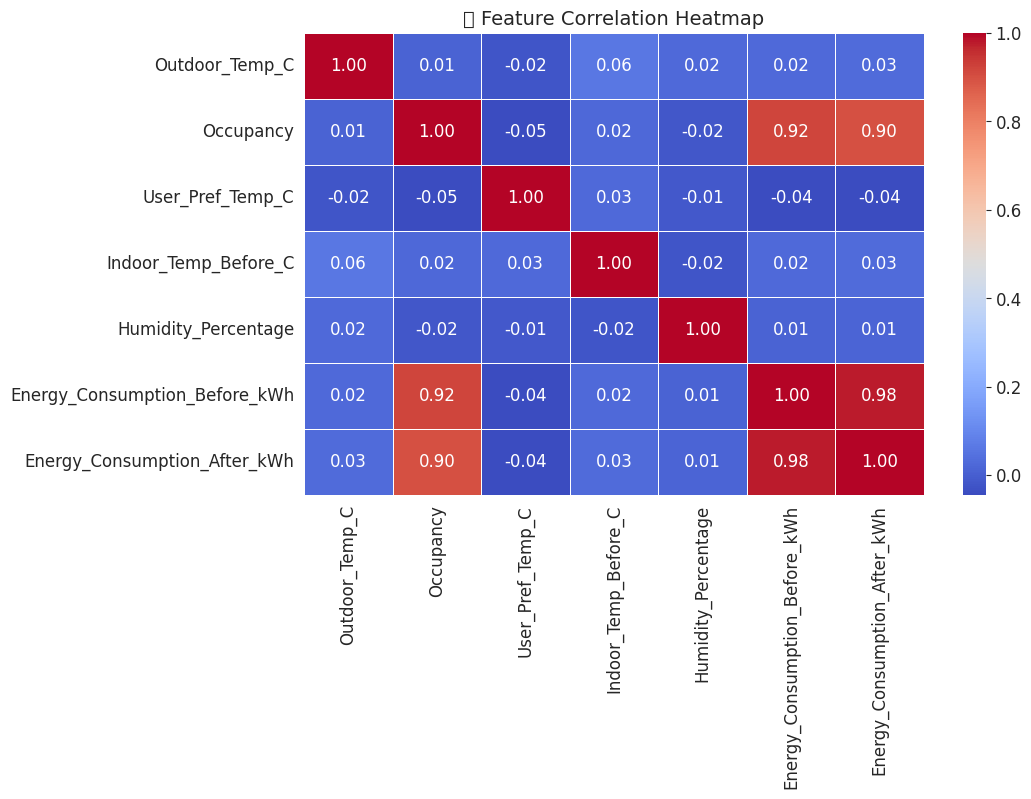

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

file_path = "ai_cooling_data.csv"
try:
    df = pd.read_csv(file_path, parse_dates=['Time_of_Day'], dayfirst=True)
    print("✅ Data Loaded Successfully!")
except FileNotFoundError:
    print(f"❌ Error: File '{file_path}' not found.")
    exit()
except Exception as e:
    print(f"❌ Error loading file: {e}")
    exit()

display(df.head())

if df["Occupancy"].dtype == "object":
    df["Occupancy"] = df["Occupancy"].map({"Yes": 1, "No": 0})

plt.figure(figsize=(12, 6))
sns.histplot(df['Energy_Consumption_Before_kWh'], bins=30, kde=True, label='Before AI', color='blue', alpha=0.6)
sns.histplot(df['Energy_Consumption_After_kWh'], bins=30, kde=True, label='After AI', color='red', alpha=0.6)
plt.legend()
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.title("🔋 Energy Consumption: Before vs After AI Optimization", fontsize=14)
plt.show()

numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("📈 Feature Correlation Heatmap", fontsize=14)


<Figure size 1200x800 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


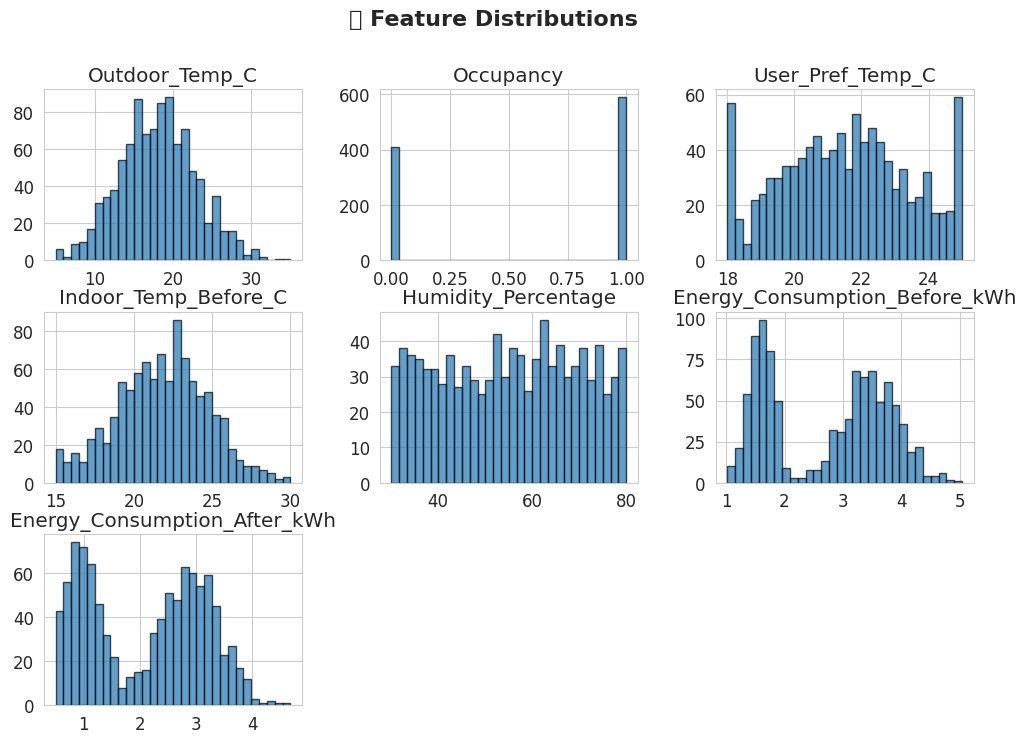

In [42]:
sns.set_style("whitegrid")
plt.rcParams.update({"font.size": 12})

plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30, color="#1f77b4", edgecolor="black", alpha=0.7)
plt.suptitle("📊 Feature Distributions", fontsize=16, fontweight="bold")
plt.show()


In [43]:
df["Time_of_Day"] = pd.to_datetime(df["Time_of_Day"], errors="coerce")

df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df["Time_of_Day"].fillna(method="ffill", inplace=True)



<ipython-input-43-8252751955b4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Time_of_Day"].fillna(method="ffill", inplace=True)
<ipython-input-43-8252751955b4>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Time_of_Day"].fillna(method="ffill", inplace=True)


In [44]:
#!pip install gradio

In [45]:
import gradio as gr

def plot_relationship(feature_x, feature_y):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature_x, y=feature_y, hue="Occupancy", alpha=0.7)
    plt.title(f"Relationship: {feature_x} vs {feature_y}")
    plt.grid(True)
    plt.tight_layout()
    return plt
feature_list = df.select_dtypes(include=["number"]).columns.tolist()
gr.Interface(
    fn=plot_relationship,
    inputs=[gr.Dropdown(feature_list, label="Feature X"), gr.Dropdown(feature_list, label="Feature Y")],
    outputs=gr.Plot(),
    title="📊 Interactive Feature Relationship Explorer",
).launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9ee163b8f69e8a6c88.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9ee163b8f69e8a6c88.gradio.live


In [46]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Occupied'] = encoder.fit_transform(df['Occupancy'])


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df["Time_of_Day"] = pd.to_datetime(df["Time_of_Day"], errors="coerce")
df["Time_of_Day"] = df["Time_of_Day"].dt.hour * 3600 + df["Time_of_Day"].dt.minute * 60 + df["Time_of_Day"].dt.second

num_cols = ["Outdoor_Temp_C", "Time_of_Day", "User_Pref_Temp_C"]

df[num_cols] = scaler.fit_transform(df[num_cols])

display(df.head())



,Time_of_Day,Outdoor_Temp_C,Occupancy,User_Pref_Temp_C,Indoor_Temp_Before_C,Humidity_Percentage,Energy_Consumption_Before_kWh,Energy_Consumption_After_kWh,Occupied
0,-1.655100,0.489424,0,-0.645953,19.079863,38.374129,1.681888,1.345279,0
1,-1.510373,-0.162058,0,0.209550,25.021400,35.228392,1.544666,1.163196,0
2,-1.365646,0.644322,0,1.243700,23.008435,61.821512,1.622679,0.962278,0
3,-1.220919,1.542414,0,-0.525889,21.317571,65.323786,1.691799,1.153048,0
4,-1.076191,-0.260439,1,-1.841693,19.528194,31.579307,3.392020,2.780078,1


In [48]:
df['Optimal_Indoor_Temperature'] = np.where(
    df['Occupancy'] == 1,
    df['User_Pref_Temp_C'] - (df['Outdoor_Temp_C'] - 25) * 0.1,
    df['User_Pref_Temp_C'] + 2
)

df['Optimal_Indoor_Temperature'] = df['Optimal_Indoor_Temperature'].clip(18, 26)

df.head()


,Time_of_Day,Outdoor_Temp_C,Occupancy,User_Pref_Temp_C,Indoor_Temp_Before_C,Humidity_Percentage,Energy_Consumption_Before_kWh,Energy_Consumption_After_kWh,Occupied,Optimal_Indoor_Temperature
0,-1.655100,0.489424,0,-0.645953,19.079863,38.374129,1.681888,1.345279,0,18.0
1,-1.510373,-0.162058,0,0.209550,25.021400,35.228392,1.544666,1.163196,0,18.0
2,-1.365646,0.644322,0,1.243700,23.008435,61.821512,1.622679,0.962278,0,18.0
3,-1.220919,1.542414,0,-0.525889,21.317571,65.323786,1.691799,1.153048,0,18.0
4,-1.076191,-0.260439,1,-1.841693,19.528194,31.579307,3.392020,2.780078,1,18.0


In [49]:
print(df.head())
print(df.info())


   Time_of_Day  Outdoor_Temp_C  Occupancy  User_Pref_Temp_C  \
0    -1.655100        0.489424          0         -0.645953   
1    -1.510373       -0.162058          0          0.209550   
2    -1.365646        0.644322          0          1.243700   
3    -1.220919        1.542414          0         -0.525889   
4    -1.076191       -0.260439          1         -1.841693   

   Indoor_Temp_Before_C  Humidity_Percentage  Energy_Consumption_Before_kWh  \
0             19.079863            38.374129                       1.681888   
1             25.021400            35.228392                       1.544666   
2             23.008435            61.821512                       1.622679   
3             21.317571            65.323786                       1.691799   
4             19.528194            31.579307                       3.392020   

   Energy_Consumption_After_kWh  Occupied  Optimal_Indoor_Temperature  
0                      1.345279         0                        18.0  
1 

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Optimal_Indoor_Temperature'])
y = df['Optimal_Indoor_Temperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (800, 9), Testing set: (200, 9)


In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Model Intercept: 18.0


In [52]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.00
R² Score: 1.00


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

import pandas as pd
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.head()


,Time_of_Day,Outdoor_Temp_C,Occupancy,User_Pref_Temp_C,Indoor_Temp_Before_C,Humidity_Percentage,Energy_Consumption_Before_kWh,Energy_Consumption_After_kWh,Occupied
0,-0.934995,-0.325628,0.833616,-0.900335,-0.915887,-0.578073,1.390547,1.594582,0.833616
1,-0.643662,0.021482,0.833616,-0.035280,0.062070,0.339593,1.185225,0.951499,0.833616
2,1.686996,-0.343903,0.833616,-1.834082,-0.383173,-1.194458,0.994911,0.783336,0.833616
3,-0.934995,-0.469823,0.833616,-0.389542,-0.709043,1.186776,0.510271,0.370421,0.833616
4,1.249998,1.560122,0.833616,0.552778,0.293026,0.193708,0.823040,1.147160,0.833616


In [54]:
def calculate_energy(indoor_temp, outdoor_temp, humidity, occupancy, k=0.5):
    base = k * abs(indoor_temp - outdoor_temp)
    humidity_penalty = 0.05 * (humidity - 50)
    occupancy_load = 0.3 * occupancy
    return np.clip(base + humidity_penalty + occupancy_load, 0.5, None)

df['Energy_Consumption_Before_kWh'] = calculate_energy(
    df['Indoor_Temp_Before_C'], df['Outdoor_Temp_C'], df['Humidity_Percentage'], df['Occupancy']
)

In [55]:
df['Energy_Consumption_After_kWh'] = calculate_energy(
    df['Optimal_Indoor_Temperature'],
    df['Outdoor_Temp_C'],
    df['Humidity_Percentage'],
    df['Occupancy']
)
df['Energy_Savings (%)'] = (
    (df['Energy_Consumption_Before_kWh'] - df['Energy_Consumption_After_kWh'])
    / df['Energy_Consumption_Before_kWh'] * 100
)

In [56]:
avg_savings = df['Energy_Savings (%)'].mean()
print(f"Average Energy Savings with AI: {avg_savings:.2f}%")


Average Energy Savings with AI: 15.49%


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['Outdoor_Temp_C', 'Time_of_Day', 'Occupancy', 'User_Pref_Temp_C']]
y = df['Optimal_Indoor_Temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
df['Hour'] = pd.to_datetime(df['Time_of_Day']).dt.hour
df['Hour_Sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_Cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df.drop('Hour', axis=1, inplace=True)

In [59]:
#!pip install xgboost

In [60]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['Outdoor_Temp_C', 'User_Pref_Temp_C', 'Hour_Sin', 'Hour_Cos']
categorical_features = ['Occupancy']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

In [61]:
X = df.drop(columns=['Optimal_Indoor_Temperature'])
y = df['Optimal_Indoor_Temperature']

train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [62]:
df = df.apply(pd.to_numeric, errors='coerce')

In [63]:
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ]
)

In [64]:
#!pip uninstall -y scikit-learn
# !pip install scikit-learn==1.3.1

In [65]:
df.fillna(df.mean(), inplace=True)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Outdoor_Temp_C',
                                                   'User_Pref_Temp_C',
                                                   'Hour_Sin', 'Hour_Cos']),
                                                 ('cat', 'passthrough',
                                                  ['Occupancy'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_ro...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [66]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE with XGBoost: {mae:.2f}°C")


MAE with XGBoost: 0.00°C


In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print(f"Best Params: {grid_search.best_params_}")

Best Params: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100}


In [68]:
print("Features used during training:", X_train.columns)

Features used during training: Index(['Time_of_Day', 'Outdoor_Temp_C', 'Occupancy', 'User_Pref_Temp_C',
       'Indoor_Temp_Before_C', 'Humidity_Percentage',
       'Energy_Consumption_Before_kWh', 'Energy_Consumption_After_kWh',
       'Occupied', 'Energy_Savings (%)', 'Hour_Sin', 'Hour_Cos'],
      dtype='object')


In [69]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor())
])

pipeline.fit(X_train, y_train)

df['Predicted Optimal Temperature (°C)'] = pipeline.predict(X)

In [70]:
def estimate_energy_use(actual_temp, optimal_temp):
    return abs(actual_temp - optimal_temp) * 0.5

df['Energy_Consumption_Before_kWh'] = df.apply(
    lambda row: estimate_energy_use(row['Indoor_Temp_Before_C'], row['User_Pref_Temp_C']), axis=1
)

df['Energy_Consumption_After_kWh'] = df.apply(
    lambda row: estimate_energy_use(row['Predicted Optimal Temperature (°C)'], row['User_Pref_Temp_C']), axis=1
)

df['Energy Savings (kWh)'] = df['Energy_Consumption_Before_kWh'] - df['Energy_Consumption_After_kWh']

df[['Indoor_Temp_Before_C', 'Predicted Optimal Temperature (°C)',
    'Energy_Consumption_Before_kWh', 'Energy_Consumption_After_kWh', 'Energy Savings (kWh)']].head()


,Indoor_Temp_Before_C,Predicted Optimal Temperature (°C),Energy_Consumption_Before_kWh,Energy_Consumption_After_kWh,Energy Savings (kWh)
0,19.079863,18.0,9.862908,9.322976,0.539932
1,25.021400,18.0,12.405925,8.895225,3.510700
2,23.008435,18.0,10.882368,8.378150,2.504217
3,21.317571,18.0,10.921730,9.262945,1.658786
4,19.528194,18.0,10.684943,9.920847,0.764097


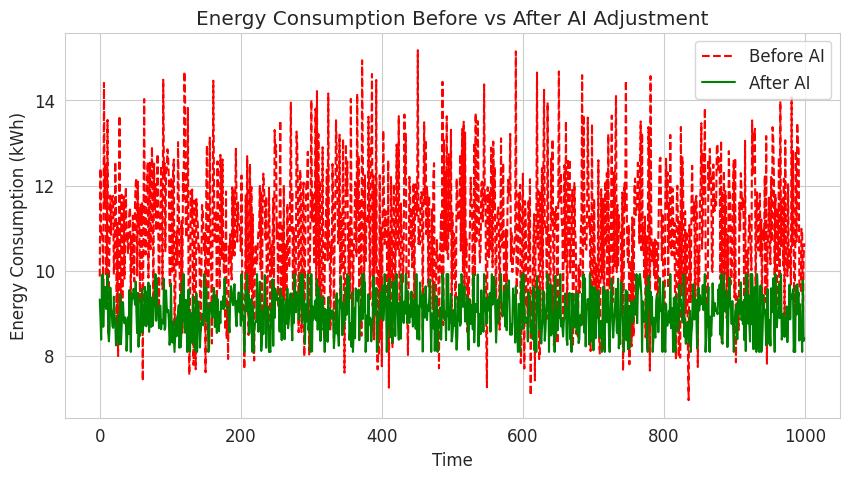

In [71]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Energy_Consumption_Before_kWh'], label="Before AI", linestyle="dashed", color="red")
plt.plot(df.index, df['Energy_Consumption_After_kWh'], label="After AI", color="green")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Before vs After AI Adjustment")
plt.legend()
plt.show()


In [72]:
total_savings = df['Energy Savings (kWh)'].sum()
total_before = df['Energy_Consumption_Before_kWh'].sum()
savings_percentage = (total_savings / total_before) * 100

print(f"🔥 Total Energy Saved: {total_savings:.2f} kWh")
print(f"⚡ Savings Percentage: {savings_percentage:.2f}%")


🔥 Total Energy Saved: 1906.18 kWh
⚡ Savings Percentage: 17.48%
